### Step 1: Data Description:
Our group choose question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
First of all let's load the datas.

In [19]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr) 
library(dplyr)  


In [20]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


1. **experience**:  
   - **Type**: Character (`chr`)  
   - **Description**: The player's experience level. This shows how much the player has played the game. The categories are:
     - `"Pro"`: Professional-level player, meaning they have a lot of playtime.
     - `"Veteran"`: Experienced player, they have played for a long time but are not professional.
     - `"Amateur"`: Casual player, new or not playing a lot.

2. **subscribe**:  
   - **Type**: Logical (`lgl`)  
   - **Description**: Whether the player has subscribed to the game's newsletter. If the player gets updates about the game. Values are:
     - `TRUE`: The player has subscribed.
     - `FALSE`: The player has not subscribed.

3. **hashedEmail**:  
   - **Type**: Character (`chr`)  
   - **Description**: A hashed version of the player's email. This hides the real email and helps keep the player’s identity private.

4. **played_hours**:  
   - **Type**: Numeric (`dbl`)  
   - **Description**: The total number of hours the player has played the game. This shows how much time the player spent playing.

5. **name**:  
   - **Type**: Character (`chr`)  
   - **Description**: The player's name. This is used to identify the player.

6. **gender**:  
   - **Type**: Character (`chr`)  
   - **Description**: The player's gender. Values include:
     - `"Male"`: Male player.
     - `"Female"`: Female player.
     - `"Other"`: Non-binary or prefer not to say.

7. **Age**:  
   - **Type**: Integer (`int`)  
   - **Description**: The player's age. This tells us how old the player is.

### Summary

- **experience**, **subscribe**, **hashedEmail**, **name**, and **gender** are categorical features of the players.
- **played_hours** and **Age** are numeric variables related to the player's activity and personal information in the game.


In [21]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


1. **hashedEmail**:  
   - **Type**: Character (`chr`)  
   - **Description**: This is a hashed version of the player's email. It hides the real email and keeps the player’s identity private. It links a session to a player.

2. **start_time**:  
   - **Type**: Character (`chr`)  
   - **Description**: This is the date and time when the session started. It is in the format `dd/mm/yyyy hh:mm`.

3. **end_time**:  
   - **Type**: Character (`chr`)  
   - **Description**: This is the date and time when the session ended. It is in the format `dd/mm/yyyy hh:mm`.

4. **original_start_time**:  
   - **Type**: Numeric (`dbl`)  
   - **Description**: This is the start time in a numeric form. It is likely in milliseconds or seconds since a reference time.

5. **original_end_time**:  
   - **Type**: Numeric (`dbl`)  
   - **Description**: This is the end time in a numeric form. It is like the start time and helps with time calculations.

### Summary

- **hashedEmail** connects each session to a specific player.
- **start_time** and **end_time** provide the actual start and end times of the session.
- **original_start_time** and **original_end_time** represent the session start and end times in numeric format, which are helpful for time-based analysis.

### Step 2: Questions

### Broad Question:

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question:

What is the relationship between total played hours and the subscription class of a player? How does a player's experience level influence the prediction of average session time for subscription class?

### Problem Explanation:

1. **Response Variable:**  
   The response variable is **`subscribe`** (whether a player subscribes to the newsletter). This variable is binary, with values `0` (not subscribed) and `1` (subscribed).

2. **Explanatory Variables:**  
   - **Total Played Hours:** This shows the total time a player has spent playing the game. It may show how engaged a player is and how that relates to the chance of subscribing to the newsletter.
   - **Experience Level:** This shows how experienced the player is. It is divided into "Beginner," "Amateur," "Veteran," and "Pro." It may show how a player's experience affects their decision to subscribe.
   - **Average Session Time:** This shows the average time a player spends per session. It may tell us about the player's engagement and predict if they will subscribe.

### How the Data Helps Solve the Problem:

1. **Analyzing Variable Relationships:**  
   By looking at the relationship between **total played hours**, **experience level**, and **subscription status**, we can find patterns that suggest which players are more likely to subscribe.

2. **Data Cleaning and Processing:**  
   - We will first change categorical variables (like `experience` and `subscribe`) to the correct format (e.g., factors for classification models).
   - We will also remove missing values to ensure the dataset is complete.
   - After cleaning, we will split the data into training and test sets to train the model and check how well it works.

3. **Model Selection and Application:**  
   We will use a **K-nearest neighbors (KNN)** classificatioin model. This model can predict if a player will subscribe based on other features. We will adjust the number of neighbors to get the best results.

### Step 3: Exploratory Data Analysis and Visualization

In this step, we will:

Do the minimum necessary wrangling to data into a tidy format

In [22]:
players_tidy<- players |>
  mutate(experience_level_num = as.numeric(factor(experience, 
                                                 levels = c("Beginner", "Amateur", "Veteran", "Pro"))))|>
  mutate(subscribe_status = factor(subscribe))|>
  mutate(gender_identity_factor = as.factor(gender))|>
   select(-hashedEmail, -name)
players_tidy

experience,subscribe,played_hours,gender,Age,experience_level_num,subscribe_status,gender_identity_factor
<chr>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<fct>
Pro,TRUE,30.3,Male,9,4,TRUE,Male
Veteran,TRUE,3.8,Male,17,3,TRUE,Male
Veteran,FALSE,0.0,Male,17,3,FALSE,Male
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Prefer not to say,17,2,FALSE,Prefer not to say
Amateur,FALSE,2.3,Male,17,2,FALSE,Male
Pro,TRUE,0.2,Other,NA,4,TRUE,Other


In [23]:

mean_values <- players_tidy |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_Age = mean(Age, na.rm = TRUE)
  )

mean_values


mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,20.52062


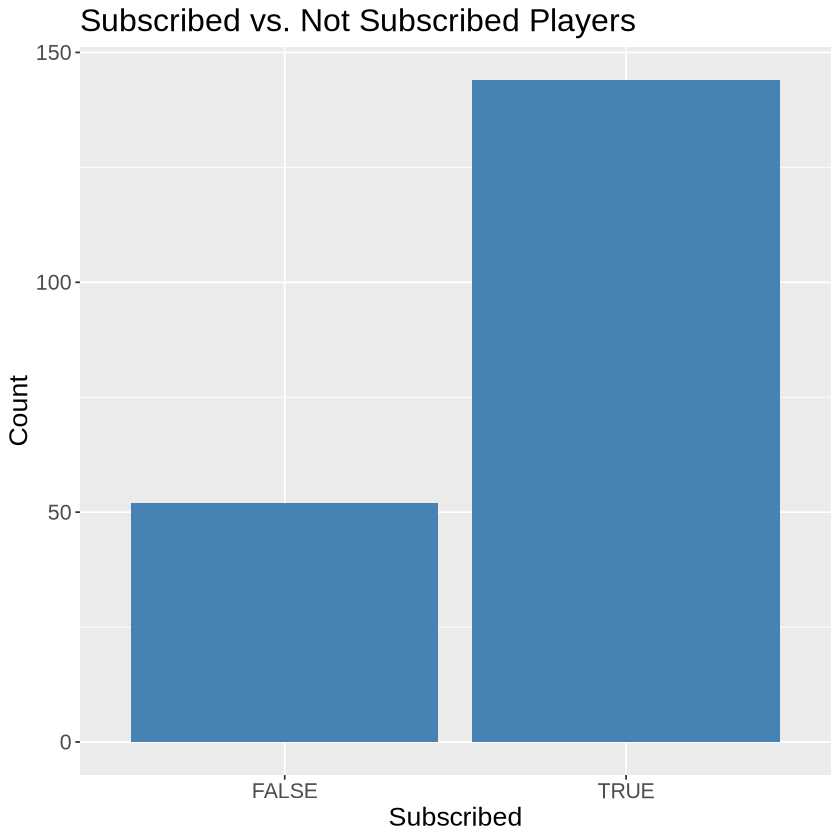

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


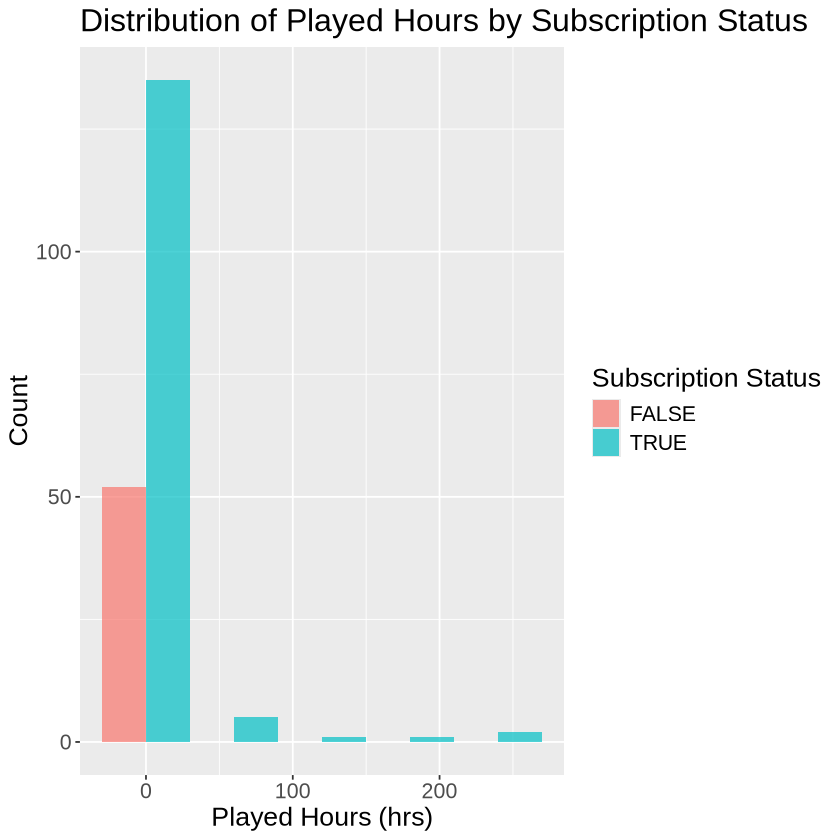

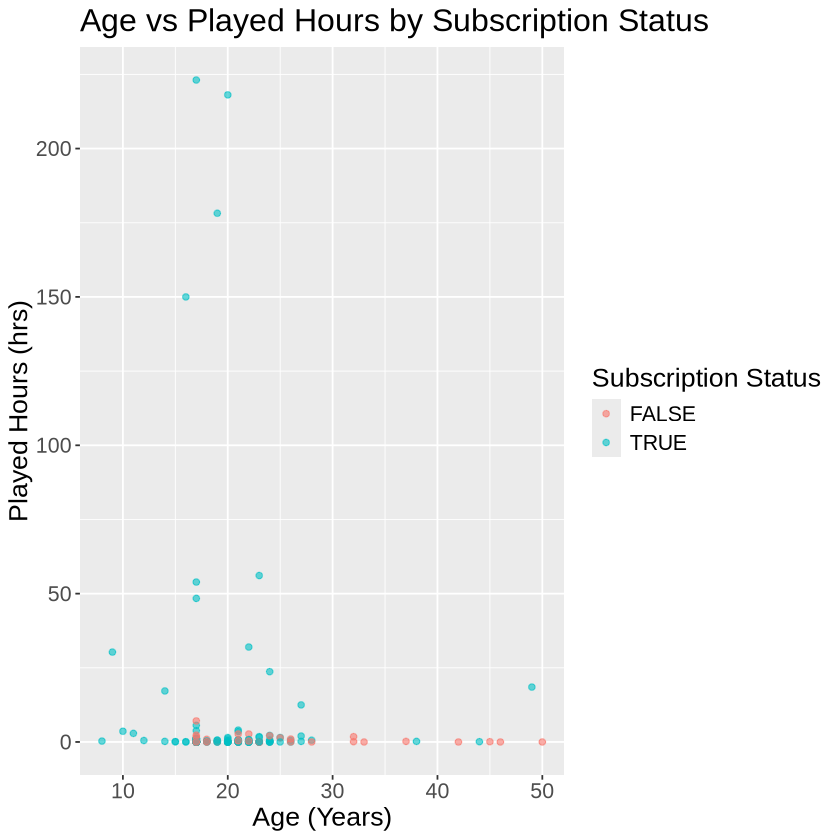

In [38]:
library(ggplot2)
options(repr.plot.width =7, repr.plot.height = 7) 

ggplot(players, aes(x = subscribe)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Subscribed vs. Not Subscribed Players",
       x = "Subscribed", y = "Count")+
theme(text = element_text(size = 16))


ggplot(players_tidy, aes(x = played_hours, fill = subscribe_status)) +
  geom_histogram(binwidth = 60, alpha = 0.7, position = "dodge") +
  labs(
    title = "Distribution of Played Hours by Subscription Status",
    x = "Played Hours (hrs)",
    y = "Count",
    fill = "Subscription Status"
  ) +
theme(text = element_text(size = 16))


ggplot(players_tidy, aes(x = Age, y = played_hours, color = subscribe_status)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Age vs Played Hours by Subscription Status",
    x = "Age (Years)",
    y = "Played Hours (hrs)",
    color = "Subscription Status"
  )+
theme(text = element_text(size = 16))

### Exploratory Data Visualizations

1. **Subscribed vs. Not Subscribed Players**
   - The first plot shows the number of subscribed players and not subscribed players. The x-axis shows subscription status (`Subscribed` vs `Not Subscribed`). The y-axis shows the count of players in each group.
   - This plot helps us see how many players are subscribed and how many are not.

2. **Distribution of Played Hours by Subscription Status**
   - The second plot is a histogram that shows the distribution of `played_hours` for players. The data is grouped by subscription status (`subscribe_status`). The x-axis shows the number of hours played. The y-axis shows the count of players in each range of hours. The bars are colored based on subscription status.
   - This plot shows how much time subscribed and non-subscribed players spend playing the game. 

3. **Age vs Played Hours by Subscription Status**
   - The third plot is a scatter plot showing the relationship between `Age` and `played_hours`. The colors show subscription status. The x-axis shows age. The y-axis shows the number of hours played.
   - This plot shows if there is a relationship between age and hours played and whether subscription status changes with age. 

### Step 4:  Methods and Plan

I will use the **k-Nearest Neighbors (k-NN)** classification to predict if a player will subscribe. **k-NN** predicts the class of a sample based on the majority class of its nearest neighbors. This is a good choice for predicting a binary outcome like `subscribe_status`.

**k-NN** is good for this dataset because it does not assume the data follows a specific pattern. It works with different features like `experience`, `played_hours`, and `age`. This method is simple and works for problems where features may have non-linear relationships with the outcome.

**k-NN** assumes that similar data points will have the same outcome. For example, players who have similar playing times or experience might have the same subscription status. This assumption fits well for this problem.

**k-NN** has some weaknesses. First, it can be slow with large datasets because it compares all points to make predictions. Second, it is sensitive to the scale of the features. Features with larger values, like `played_hours`, can dominate unless the data is scaled. Also, choosing the right value for `k` is important. If `k` is too small, the model may overfit, and if `k` is too large, it may underfit.

To choose the best model, I will use **cross-validation**. This splits the training data into several parts. I will test different values for `k` (like 2, 3, 4) and pick the one that works best. I will then check the model’s performance using accuracy.

For data processing, I will split the data into training and testing sets. I will use 80% of the data for training and 20% for testing. I will make sure the `subscribe_status` is represented well in both sets. I will also standardize the numeric features (`played_hours`, `age`, `experience_level_num`) because **k-NN** is sensitive to different scales.

Finally, I will use **k-fold cross-validation** on the training data. I will split the data into 5 parts. I will train the model on 4 parts and test it on the last part. I will repeat this 5 times, each time testing on a different part.